In [1]:
import main
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import time

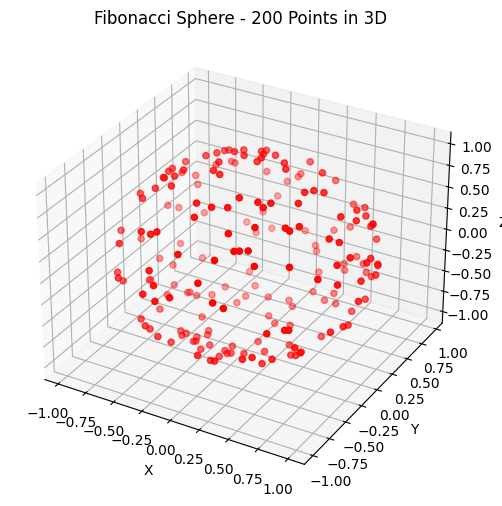

0.9999999999999999


In [20]:
def fibonacci_sphere_nd(n_points, dim):

    # Initialize an array to store the points
    points = np.zeros((n_points, dim))
    
    # The golden angle in higher dimensions
    golden_angle = np.pi * (3 - np.sqrt(5))  # Approximation of the golden ratio

    for i in range(n_points):
        theta = i * golden_angle
        phi = np.arccos(1 - 2 * (i + 0.5) / n_points)  # Uniformly distributed latitude (in higher dimensions)
        
        # Generate coordinates in the n-dimensional hypersphere using spherical parametrization
        point = np.zeros(dim)
        
        point[0] = np.cos(theta) * np.sin(phi)
        point[1] = np.sin(theta) * np.sin(phi)
        
        # Generate the remaining components for higher dimensions
        for d in range(2, dim):
            point[d] = np.random.normal(0, 1)  # Random component for higher dimensions
            point /= np.linalg.norm(point)  # Normalize to lie on the unit sphere
        
        points[i] = point
    
    return points

# Example usage:
n_points = 200  # Number of points
dim = 3 # Hypersphere in 4 dimensions
points_nd = fibonacci_sphere_nd(n_points, dim)

# Create a 2D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_nd[:, 0], points_nd[:, 1], points_nd[:, 2], c='r', marker='o')

# Label the axes
ax.set_title(f'Fibonacci Sphere - {n_points} Points in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
print(np.linalg.norm(points_nd[50]))

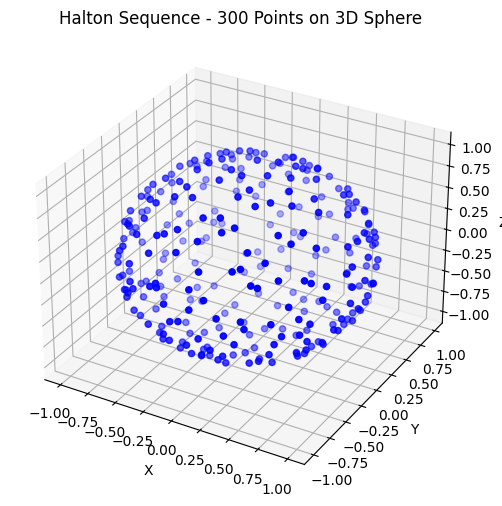

In [42]:
import numpy as np
from scipy.stats.qmc import Halton
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def halton_sphere(n_points, dim=3):
    """
    Generate points on the surface of a unit sphere using the Halton sequence.
    
    Parameters:
    n_points (int): Number of points to generate.
    dim (int): Dimension of the Halton sequence (should be 3 for 3D).
    
    Returns:
    points (ndarray): Array of shape (n_points, 3) containing points on the sphere.
    """
    # Generate Halton sequence in [0, 1]^3
    sampler = Halton(d=dim)
    halton_points = sampler.random(n_points)
    
    # Map Halton points to the surface of a unit sphere
    points = np.zeros((n_points, 3))
    
    for i in range(n_points):
        # Spherical coordinates transformation
        phi = np.arccos(1 - 2 * halton_points[i, 2])  # Latitude from z Halton value
        theta = 2 * np.pi * halton_points[i, 1]  # Longitude from y Halton value
        
        # Convert spherical to Cartesian coordinates
        x = np.sin(phi) * np.cos(theta)
        y = np.sin(phi) * np.sin(theta)
        z = np.cos(phi)
        
        points[i] = [x, y, z]
    
    return points

# Parameters
n_points = 300  # Number of points

# Generate points on the unit sphere using the Halton sequence
points_sphere = halton_sphere(n_points)

# Create a 3D scatter plot to visualize the points
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_sphere[:, 0], points_sphere[:, 1], points_sphere[:, 2], c='b', marker='o')

# Label the axes
ax.set_title(f'Halton Sequence - {n_points} Points on 3D Sphere')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


Text(0, 0.5, 'y')

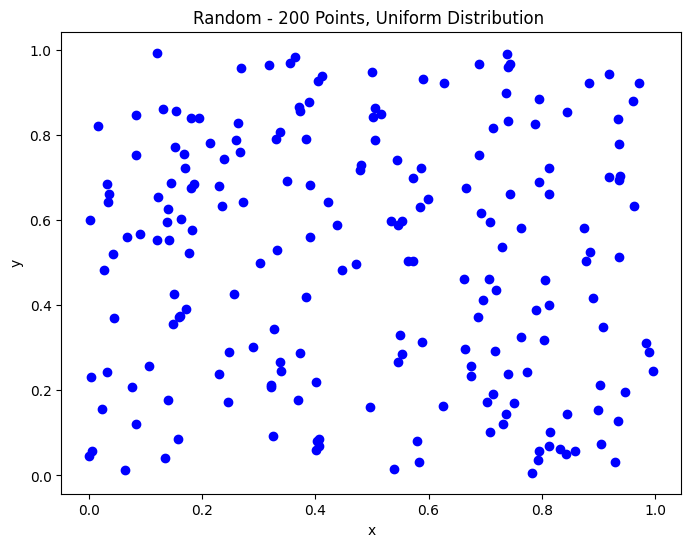

In [55]:
n_points = 200  # Number of points
ran_points = np.random.uniform(0,1,size=(n_points,2))
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(ran_points[:, 0], ran_points[:, 1], c='b', marker='o')

ax.set_title(f'Random - {n_points} Points, Uniform Distribution ')
ax.set_xlabel('x')
ax.set_ylabel('y')


In [85]:
def restricted_cmap(C, W):
    R = np.linspace(-20, 20, 300)
    X, Y = np.meshgrid(R, R)
    res = np.zeros((X.shape[0], Y.shape[0]))

    # Apply W constraints (positive values)
    for w in W:
        for i in range(X.shape[0]):
            for j in range(Y.shape[0]):
                if w @ np.array([X[i][j], Y[i][j]]) >= 0:
                    res[i][j] += 1

    # Apply C constraints (negative values -> set to -1)
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            for c in C:
                if c @ np.array([X[i][j], Y[i][j]]) < 0:
                    res[i][j] = -1

    # Plotting the result using pcolormesh for sharp transitions
    fig, ax = plt.subplots()

    # Define color map where black represents -1 and other colors for positive values
    cmap = matplotlib.colors.ListedColormap(["black", "blue", "orange", "yellow"] + ["green"] * (W.shape[0] - 2))
    # Define boundaries that correspond to integer levels
    boundaries = np.arange(-1, W.shape[0] + 2) - 0.5
    norm = matplotlib.colors.BoundaryNorm(boundaries, cmap.N, clip=True)

    # pcolormesh creates a sharp block-like color map
    ctf = ax.pcolormesh(X, Y, res,cmap=cmap)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar(ctf, ticks=np.arange(0, W.shape[0] + 1))
    plt.show()
    return res

[[-0.00351899  0.30088674 -0.31822726  0.22934917 -0.36732732 -0.40409801
  -0.34760064  0.07208681  0.52490629 -0.23624408]
 [-0.06410954  0.17396789 -0.31866473 -0.68237843  0.05355365  0.08234624
  -0.04252127 -0.29985844  0.31794514  0.44269227]
 [ 0.41759495 -0.28020587  0.14365193 -0.150062   -0.55867502 -0.14924185
   0.12848889  0.42173512  0.02542164  0.41777695]
 [-0.37111251 -0.56678145 -0.48735899  0.13760041 -0.09625703  0.17847585
  -0.41413912  0.1100018  -0.17604129  0.16988362]
 [ 0.20356933  0.18760145  0.10049687  0.37425735  0.25487575  0.57165543
  -0.2033621   0.26089375  0.39333248  0.34251034]
 [ 0.09465947  0.60214307 -0.27696656  0.16253042 -0.23907469  0.07492023
  -0.07720916 -0.03028363 -0.62209225  0.26208745]
 [-0.56533543  0.23870988  0.03475388 -0.10405911  0.22840391 -0.25306975
   0.18632436  0.65678436  0.00086456  0.17053285]
 [-0.14484441 -0.08470136  0.2833142   0.37740905  0.13514919 -0.48464347
  -0.08908654 -0.40517813  0.0283863   0.56840579]


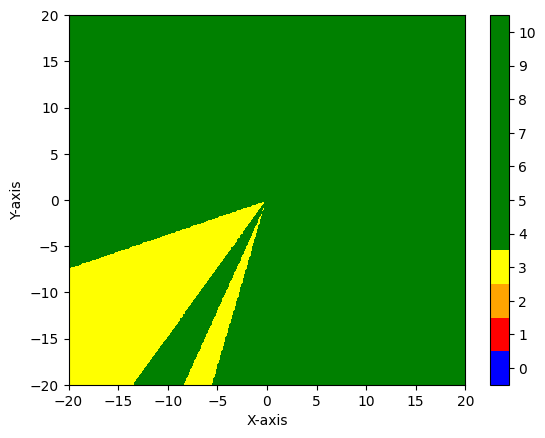

array([[3., 3., 3., ..., 5., 5., 5.],
       [3., 3., 3., ..., 5., 5., 5.],
       [3., 3., 3., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 7., 7., 7.],
       [5., 5., 5., ..., 7., 7., 7.],
       [5., 5., 5., ..., 7., 7., 7.]])

In [2]:
R=main.orthogonal_init((10,2))
print(R)
main.cmap(R)

In [2]:
res=main.main()#constrained d=2
print(res)

HaltonCarlo d^c d=4 v1
start for d=6
35 []
36 [982]
37 [982, 982]
38 [982, 982, 986]
39 [982, 982, 986, 990]


In [13]:
print(res[2])

[[[912, 919, 919, 921], [794, 805, 806, 807], [611, 630, 630, 632], [425, 442, 442, 451], [300, 317, 321, 321], [179, 190, 192, 195], [130, 142, 146, 147], [66, 72, 75, 76], [48, 50, 50, 50], [17, 19, 19, 21], [16, 17, 19, 19], [11, 14, 15, 16], [8, 9, 9, 9]], [[996, 999, 999, 1000], [969, 978, 979, 982], [904, 918, 927, 931], [812, 836, 847, 855], [686, 712, 733, 744], [536, 574, 595, 608], [435, 477, 492, 502], [319, 349, 373, 387], [238, 276, 290, 294], [156, 184, 199, 207], [96, 115, 131, 135], [77, 93, 100, 103], [44, 48, 54, 60], [30, 38, 43, 47], [17, 17, 18, 21]], [[1000, 1000, 1000, 1000], [998, 1000, 1000, 1000], [988, 995, 995, 996], [970, 982, 986, 989], [919, 941, 958, 966], [838, 870, 895, 909], [736, 783, 810, 832], [654, 709, 750, 765], [514, 580, 620, 630], [377, 443, 490, 511], [301, 362, 398, 427], [242, 294, 331, 342], [179, 214, 246, 271], [112, 139, 171, 195], [87, 115, 144, 157], [55, 79, 92, 101]]]


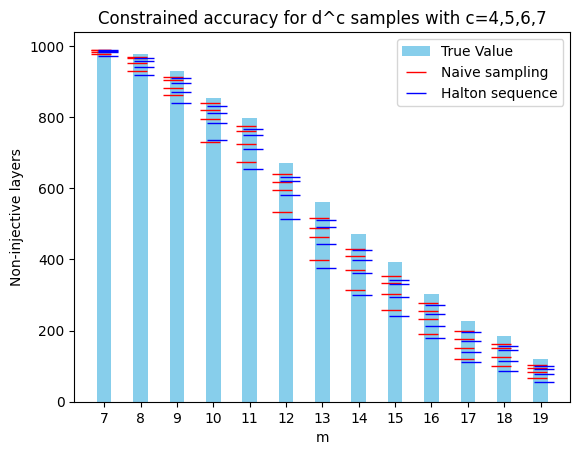

In [28]:
# Comparison naive Mopnte Carlo and Halton Sequence cnstrained d=4
true_values=[ 989, 977, 929, 853, 797, 671, 561, 472, 393, 302, 226, 186, 121]
estimations_left=[  [977, 983, 988, 989], [930, 951, 966, 968], [862, 882, 904, 913], [729, 793, 819, 839], [674, 723, 760, 775], [534, 596, 617, 641], [397, 462, 487, 516], [315, 370, 409, 429], [259, 303, 334, 352], [189, 232, 256, 278], [119, 150, 177, 199], [101, 126, 152, 163], [66, 83, 95, 103]]
estimations_right=[  [970, 982, 986, 989], [919, 941, 958, 966], [838, 870, 895, 909], [736, 783, 810, 832], [654, 709, 750, 765], [514, 580, 620, 630], [377, 443, 490, 511], [301, 362, 398, 427], [242, 294, 331, 342], [179, 214, 246, 271], [112, 139, 171, 195], [87, 115, 144, 157], [55, 79, 92, 101]]
categories=np.arange(7,20)
colors_left = 'red'     # Colors for the left-side estimations
colors_right = 'blue' # Colors for the right-side estimations

# Create bar plot for true values
x = np.arange(len(categories))  # X locations for the bars
bar_width = 0.4
plt.bar(x, true_values, width=bar_width, label='True Value', color='skyblue')

# Offset for the ticks on the left and right of the bars
offset_left = -0.1
offset_right = 0.1

# Plot horizontal lines (ticks) for the left-side estimations
for i in range(3):  # Two estimations on the left side for each bar
    plt.errorbar(x + offset_left, [est[i] for est in estimations_left], fmt='_', color=colors_left, markersize=15)
plt.errorbar(x + offset_left, [est[3] for est in estimations_left], fmt='_', color=colors_left, markersize=15,label="Naive sampling")
# Plot horizontal lines (ticks) for the right-side estimations
for i in range(3):  # Two estimations on the right side for each bar
    plt.errorbar(x + offset_right, [est[i] for est in estimations_right], fmt='_', color=colors_right, markersize=15)
plt.errorbar(x + offset_right, [est[3] for est in estimations_right], fmt='_', color=colors_right, markersize=15,label="Halton sequence")
# Labels and title
plt.xticks(x, categories)
plt.ylabel('Non-injective layers')
plt.xlabel("m")
plt.title("Constrained accuracy for d^c samples with c=4,5,6,7")

# Show legend
plt.legend()

# Show the plot
plt.show()

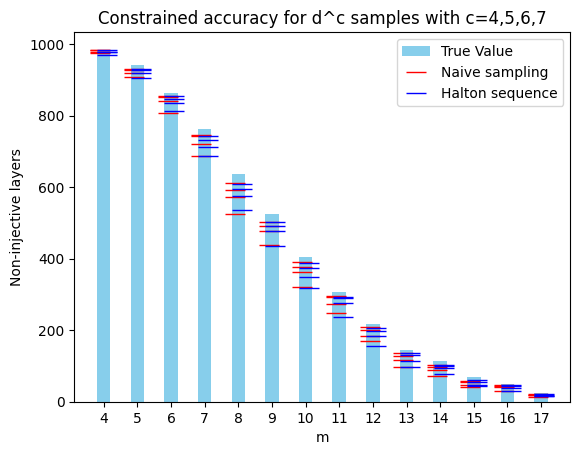

In [27]:
# Comparison naive Mopnte Carlo and Halton Sequence cnstrained d=3
true_values=[ 984, 940, 863, 763, 636, 524, 405, 307, 216, 145, 114, 70, 49, 25]
estimations_left=[ [974, 978, 982, 982], [908, 919, 926, 931], [808, 842, 851, 855], [687, 721, 742, 746], [525, 572, 592, 612], [438, 476, 492, 502], [320, 363, 378, 391], [249, 272, 292, 295], [171, 185, 201, 209], [97, 117, 127, 135], [73, 88, 98, 104], [40, 47, 54, 59], [31, 40, 44, 46], [14, 19, 21, 20]]
estimations_right=[ [969, 978, 979, 982], [904, 918, 927, 931], [812, 836, 847, 855], [686, 712, 733, 744], [536, 574, 595, 608], [435, 477, 492, 502], [319, 349, 373, 387], [238, 276, 290, 294], [156, 184, 199, 207], [96, 115, 131, 135], [77, 93, 100, 103], [44, 48, 54, 60], [30, 38, 43, 47], [17, 17, 18, 21]]
categories=np.arange(4,18)
colors_left = 'red'     # Colors for the left-side estimations
colors_right = 'blue' # Colors for the right-side estimations

# Create bar plot for true values
x = np.arange(len(categories))  # X locations for the bars
bar_width = 0.4
plt.bar(x, true_values, width=bar_width, label='True Value', color='skyblue')

# Offset for the ticks on the left and right of the bars
offset_left = -0.1
offset_right = 0.1

# Plot horizontal lines (ticks) for the left-side estimations
for i in range(3):  # Two estimations on the left side for each bar
    plt.errorbar(x + offset_left, [est[i] for est in estimations_left], fmt='_', color=colors_left, markersize=15)
plt.errorbar(x + offset_left, [est[3] for est in estimations_left], fmt='_', color=colors_left, markersize=15,label="Naive sampling")
# Plot horizontal lines (ticks) for the right-side estimations
for i in range(3):  # Two estimations on the right side for each bar
    plt.errorbar(x + offset_right, [est[i] for est in estimations_right], fmt='_', color=colors_right, markersize=15)
plt.errorbar(x + offset_right, [est[3] for est in estimations_right], fmt='_', color=colors_right, markersize=15,label="Halton sequence")
# Labels and title
plt.xticks(x, categories)
plt.ylabel('Non-injective layers')
plt.xlabel("m")
plt.title("Constrained accuracy for d^c samples with c=4,5,6,7")

# Show legend
plt.legend()

# Show the plot
plt.show()

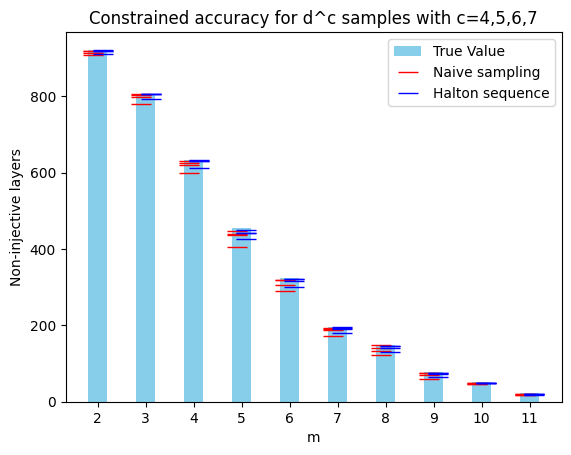

In [26]:
# Comparison naive Mopnte Carlo and Halton Sequence cnstrained d=2
true_values=[922, 807, 634, 455, 324, 197, 149, 77, 52, 22]
estimations_left=[[909, 913, 919, 919], [781, 799, 804, 806], [600, 621, 625, 631], [405, 438, 440, 446], [289, 305, 319, 319], [173, 188, 191, 193], [123, 133, 142, 148], [60, 71, 75, 76], [46, 47, 49, 50], [18, 17, 20, 20]]
estimations_right=[[912, 919, 919, 921], [794, 805, 806, 807], [611, 630, 630, 632], [425, 442, 442, 451], [300, 317, 321, 321], [179, 190, 192, 195], [130, 142, 146, 147], [66, 72, 75, 76], [48, 50, 50, 50], [17, 19, 19, 21]]
categories=np.arange(2,12)
colors_left = 'red'     # Colors for the left-side estimations
colors_right = 'blue' # Colors for the right-side estimations

# Create bar plot for true values
x = np.arange(len(categories))  # X locations for the bars
bar_width = 0.4
plt.bar(x, true_values, width=bar_width, label='True Value', color='skyblue')

# Offset for the ticks on the left and right of the bars
offset_left = -0.1
offset_right = 0.1

# Plot horizontal lines (ticks) for the left-side estimations
for i in range(3):  # Two estimations on the left side for each bar
    plt.errorbar(x + offset_left, [est[i] for est in estimations_left], fmt='_', color=colors_left, markersize=15)
plt.errorbar(x + offset_left, [est[3] for est in estimations_left], fmt='_', color=colors_left, markersize=15,label="Naive sampling")
# Plot horizontal lines (ticks) for the right-side estimations
for i in range(3):  # Two estimations on the right side for each bar
    plt.errorbar(x + offset_right, [est[i] for est in estimations_right], fmt='_', color=colors_right, markersize=15)
plt.errorbar(x + offset_right, [est[3] for est in estimations_right], fmt='_', color=colors_right, markersize=15,label="Halton sequence")
# Labels and title
plt.xticks(x, categories)
plt.ylabel('Non-injective layers')
plt.xlabel("m")
plt.title("Constrained accuracy for d^c samples with c=4,5,6,7")

# Show legend
plt.legend()

# Show the plot
plt.show()

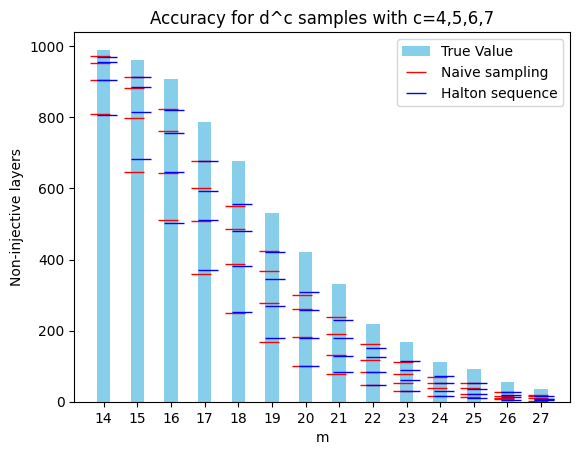

In [5]:
# Comparison naive Mopnte Carlo and Halton Sequence d=4
true_values=[990, 960, 909, 786, 676, 532, 422, 332, 219, 168, 113, 92, 55, 36]
estimations_left=[[809, 904, 953, 973], [645, 797, 883, 913], [510, 642, 762, 823], [358, 507, 602, 678], [249, 386, 486, 550], [169, 278, 368, 425], [100, 183, 260, 301], [79, 131, 191, 237], [48, 84, 116, 161], [29, 52, 77, 111], [16, 38, 53, 70], [12, 21, 40, 54], [7, 10, 17, 28], [3, 10, 16, 19]]
estimations_right=[[806, 904, 956, 969], [682, 816, 886, 912], [502, 647, 755, 821], [370, 510, 594, 678], [251, 381, 481, 557], [180, 268, 344, 421], [101, 180, 258, 310], [85, 130, 178, 231], [47, 83, 125, 150], [31, 62, 90, 114], [17, 31, 52, 71], [10, 23, 37, 52], [6, 12, 19, 27], [5, 7, 9, 15]]
categories=np.arange(14,28)
colors_left = 'red'     # Colors for the left-side estimations
colors_right = 'blue' # Colors for the right-side estimations

# Create bar plot for true values
x = np.arange(len(categories))  # X locations for the bars
bar_width = 0.4
plt.bar(x, true_values, width=bar_width, label='True Value', color='skyblue')

# Offset for the ticks on the left and right of the bars
offset_left = -0.1
offset_right = 0.1

# Plot horizontal lines (ticks) for the left-side estimations
for i in range(3):  # Two estimations on the left side for each bar
    plt.errorbar(x + offset_left, [est[i] for est in estimations_left], fmt='_', color=colors_left, markersize=15)
plt.errorbar(x + offset_left, [est[3] for est in estimations_left], fmt='_', color=colors_left, markersize=15,label="Naive sampling")
# Plot horizontal lines (ticks) for the right-side estimations
for i in range(3):  # Two estimations on the right side for each bar
    plt.errorbar(x + offset_right, [est[i] for est in estimations_right], fmt='_', color=colors_right, markersize=15)
plt.errorbar(x + offset_right, [est[3] for est in estimations_right], fmt='_', color=colors_right, markersize=15,label="Halton sequence")
# Labels and title
plt.xticks(x, categories)
plt.ylabel('Non-injective layers')
plt.xlabel("m")
plt.title("Accuracy for d^c samples with c=4,5,6,7")

# Show legend
plt.legend()

# Show the plot
plt.show()

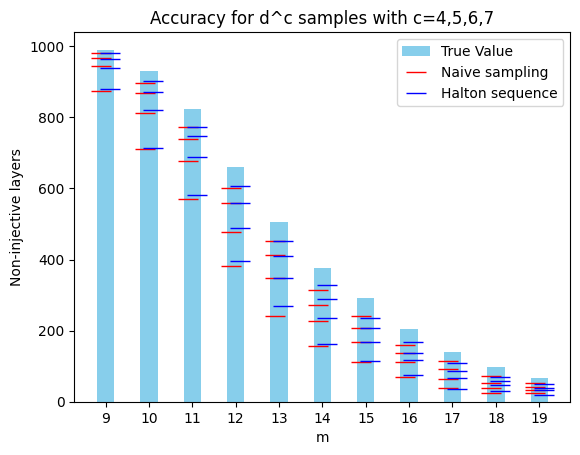

In [3]:
# Comparison naive Mopnte Carlo and Halton Sequence d=3
true_values=[990, 931, 824, 660, 505, 376, 292, 205, 139, 98, 66]
estimations_left=[[875, 944, 968, 980], [710, 813, 867, 897], [570, 677, 739, 773], [381, 478, 558, 600], [241, 348, 414, 451], [157, 228, 273, 313], [112, 169, 207, 241], [69, 112, 138, 160], [38, 64, 91, 115], [25, 38, 54, 73], [24, 34, 41, 54]]
estimations_right=[[880, 938, 965, 980], [715, 820, 872, 901], [581, 688, 746, 774], [395, 489, 559, 606], [269, 349, 411, 453], [161, 235, 290, 327], [114, 167, 206, 235], [74, 117, 138, 168], [37, 66, 87, 109], [29, 46, 58, 69], [20, 33, 39, 50]]
categories=np.arange(9,20)
colors_left = 'red'     # Colors for the left-side estimations
colors_right = 'blue' # Colors for the right-side estimations

# Create bar plot for true values
x = np.arange(len(categories))  # X locations for the bars
bar_width = 0.4
plt.bar(x, true_values, width=bar_width, label='True Value', color='skyblue')

# Offset for the ticks on the left and right of the bars
offset_left = -0.1
offset_right = 0.1

# Plot horizontal lines (ticks) for the left-side estimations
for i in range(3):  # Two estimations on the left side for each bar
    plt.errorbar(x + offset_left, [est[i] for est in estimations_left], fmt='_', color=colors_left, markersize=15)
plt.errorbar(x + offset_left, [est[3] for est in estimations_left], fmt='_', color=colors_left, markersize=15,label="Naive sampling")
# Plot horizontal lines (ticks) for the right-side estimations
for i in range(3):  # Two estimations on the right side for each bar
    plt.errorbar(x + offset_right, [est[i] for est in estimations_right], fmt='_', color=colors_right, markersize=15)
plt.errorbar(x + offset_right, [est[3] for est in estimations_right], fmt='_', color=colors_right, markersize=15,label="Halton sequence")
# Labels and title
plt.xticks(x, categories)
plt.ylabel('Non-injective layers')
plt.xlabel("m")
plt.title("Accuracy for d^c samples with c=4,5,6,7")

# Show legend
plt.legend()

# Show the plot
plt.show()

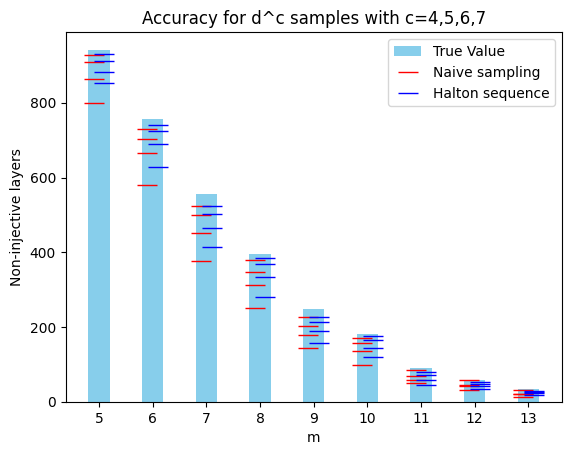

In [10]:
# Comparison naive Mopnte Carlo and Halton Sequence d=2
true_values=[942, 757, 557, 396, 249, 182, 89, 59, 35]
estimations_left=[[799, 864, 909, 929], [581, 666, 704, 730], [377, 451, 500, 524], [252, 312, 348, 378], [143, 179, 203, 226], [97, 136, 156, 170], [49, 58, 70, 84], [31, 42, 46, 57], [13, 22, 21, 31]]
estimations_right=[[852, 882, 912, 931], [628, 691, 724, 741], [415, 464, 502, 524], [279, 334, 368, 384], [158, 188, 214, 226], [119, 144, 165, 175], [46, 58, 72, 80], [34, 41, 47, 54],[17,24,27,30]]
categories=np.arange(5,14)
colors_left = 'red'     # Colors for the left-side estimations
colors_right = 'blue' # Colors for the right-side estimations

# Create bar plot for true values
x = np.arange(len(categories))  # X locations for the bars
bar_width = 0.4
plt.bar(x, true_values, width=bar_width, label='True Value', color='skyblue')

# Offset for the ticks on the left and right of the bars
offset_left = -0.1
offset_right = 0.1

# Plot horizontal lines (ticks) for the left-side estimations
for i in range(3):  # Two estimations on the left side for each bar
    plt.errorbar(x + offset_left, [est[i] for est in estimations_left], fmt='_', color=colors_left, markersize=15)
plt.errorbar(x + offset_left, [est[3] for est in estimations_left], fmt='_', color=colors_left, markersize=15,label="Naive sampling")
# Plot horizontal lines (ticks) for the right-side estimations
for i in range(3):  # Two estimations on the right side for each bar
    plt.errorbar(x + offset_right, [est[i] for est in estimations_right], fmt='_', color=colors_right, markersize=15)
plt.errorbar(x + offset_right, [est[3] for est in estimations_right], fmt='_', color=colors_right, markersize=15,label="Halton sequence")
# Labels and title
plt.xticks(x, categories)
plt.ylabel('Non-injective layers')
plt.xlabel("m")
plt.title("Accuracy for d^c samples with c=4,5,6,7")

# Show legend
plt.legend()

# Show the plot
plt.show()

40


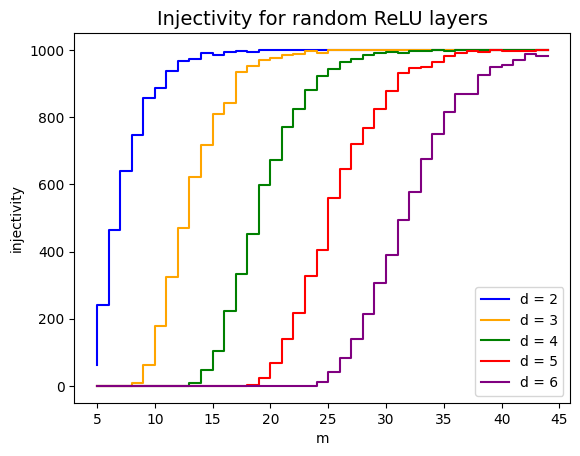

In [9]:
# plot for plain injectivity
res_2345=[[61, 242, 464, 640, 746, 856, 888, 938, 968, 974, 991, 986, 994, 997, 995, 1000, 1000, 999, 1000, 1000, 999, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000], [0, 0, 0, 0, 10, 62, 178, 323, 469, 622, 716, 809, 841, 934, 953, 970, 976, 984, 989, 997, 992, 999, 999, 1000, 1000, 999, 1000, 1000, 1000, 1000,1000, 1000, 1000, 1000,1000,1000,1000,1000,1000, 1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 46, 105, 222, 332, 453, 598, 672, 771, 824, 880, 922, 942, 963, 973, 985, 991, 993, 991, 998, 997,1000, 998, 1000, 1000, 1000,1000,1000,1000,1000,1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 25, 69, 140, 216, 328, 405, 560, 647, 721, 767, 823, 878, 931, 945, 950, 964, 982, 991, 996, 993,999, 996, 997, 997, 1000]]
res6=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 1, 11, 40, 83, 141, 215,307,391,494,577,676,750,816,869,868,926,948,956,969,988,982]
print(len(res6))
plt.step(np.arange(5,45),res_2345[0],label="d = 2",color="blue")
plt.step(np.arange(5,45),res_2345[1],label="d = 3",color="orange")
plt.step(np.arange(5,45),res_2345[2], label="d = 4",color="green") 
plt.step(np.arange(5,45),res_2345[3], label="d = 5",color="red")
plt.step(np.arange(5,45),res6, label="d = 6",color="purple")
plt.xlabel("m")
plt.ylabel("injectivity")
plt.title("Injectivity for random ReLU layers", fontsize=14)
plt.legend()

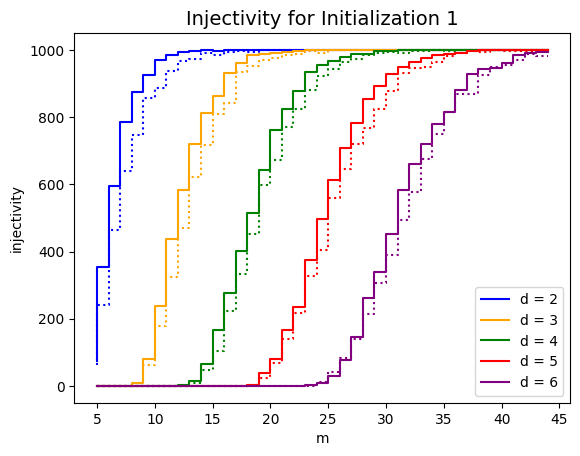

In [4]:
# plot for structured init injectivity
res_2345=[[61, 242, 464, 640, 746, 856, 888, 938, 968, 974, 991, 986, 994, 997, 995, 1000, 1000, 999, 1000, 1000, 999, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000], [0, 0, 0, 0, 10, 62, 178, 323, 469, 622, 716, 809, 841, 934, 953, 970, 976, 984, 989, 997, 992, 999, 999, 1000, 1000, 999, 1000, 1000, 1000, 1000,1000, 1000, 1000, 1000,1000,1000,1000,1000,1000, 1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 46, 105, 222, 332, 453, 598, 672, 771, 824, 880, 922, 942, 963, 973, 985, 991, 993, 991, 998, 997,1000, 998, 1000, 1000, 1000,1000,1000,1000,1000,1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 25, 69, 140, 216, 328, 405, 560, 647, 721, 767, 823, 878, 931, 945, 950, 964, 982, 991, 996, 993,999, 996, 997, 997, 1000]]
res6=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 1, 11, 40, 83, 141, 215,307,391,494,577,676,750,816,869,868,926,948,956,969,988,982]
plt.step(np.arange(5,45),res_2345[0],linestyle="dotted",color="blue")
plt.step(np.arange(5,45),res_2345[1],linestyle="dotted",color="orange")
plt.step(np.arange(5,45),res_2345[2],linestyle="dotted", color="green") 
plt.step(np.arange(5,45),res_2345[3],linestyle="dotted", color="red")
plt.step(np.arange(5,45),res6,linestyle="dotted", color="purple")
####
init2=[75, 354, 595, 784, 875, 925, 969, 984, 994, 997, 999, 998, 999, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]
init3=[0, 0, 0, 0, 10, 79, 237, 437, 582, 720, 812, 863, 932, 960, 986, 987, 991, 994, 998, 1000, 999, 1000, 1000, 999, 999, 1000, 1000, 1000, 1000, 1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]
init4=[0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 66, 165, 276, 402, 515, 642, 763, 823, 877, 933, 955, 968, 979, 989, 987, 996, 998, 999, 1000, 1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]
init5=[0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 1, 3, 38, 81, 165, 234, 374, 496, 613, 707, 782, 855, 893, 927, 949, 964, 976, 985, 988, 991, 998, 999,1000,1000,1000,1000,1000]
init6=[0]*15+[0,0,0,0, 4, 10, 30, 78, 146, 262, 340, 452, 582, 660, 720, 780, 816, 882, 928, 942,946, 962, 984, 992, 994]
plt.step(np.arange(5,45),init2,label="d = 2",color="blue")
plt.step(np.arange(5,45),init3,label="d = 3",color="orange")
plt.step(np.arange(5,45),init4,label="d = 4",color="green")
plt.step(np.arange(5,45),init5,label="d = 5",color="red")
plt.step(np.arange(5,45),init6,label="d = 6",color="purple")
####
plt.xlabel("m")
plt.ylabel("injectivity")
plt.title("Injectivity for Initialization 1", fontsize=14)
plt.legend()

35


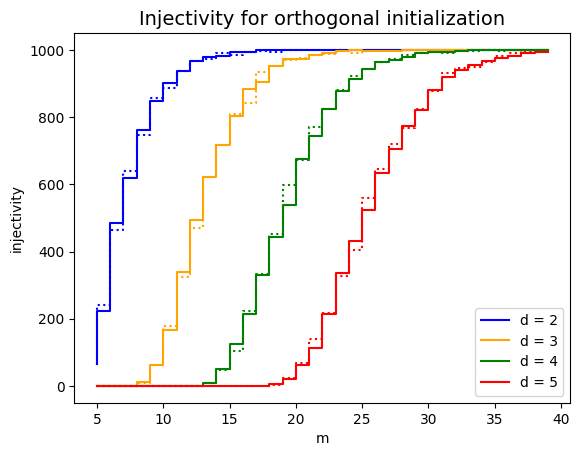

In [4]:
# plot for orthogonal init injectivity
res_2345=[[61, 242, 464, 640, 746, 856, 888, 938, 968, 974, 991, 986, 994, 997, 995, 1000, 1000, 999, 1000, 1000, 999, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,1000,1000,1000,1000,1000], [0, 0, 0, 0, 10, 62, 178, 323, 469, 622, 716, 809, 841, 934, 953, 970, 976, 984, 989, 997, 992, 999, 999, 1000, 1000, 999, 1000, 1000, 1000, 1000,1000, 1000, 1000, 1000,1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 46, 105, 222, 332, 453, 598, 672, 771, 824, 880, 922, 942, 963, 973, 985, 991, 993, 991, 998, 997,1000, 998, 1000, 1000, 1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 25, 69, 140, 216, 328, 405, 560, 647, 721, 767, 823, 878, 931, 945, 950, 964, 982, 991, 996, 993]]
res6=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 1, 11, 40, 83, 141, 215,307,391,494,577,676,750,816,869,868,926,948,956,969,988,982]
plt.step(np.arange(5,40),res_2345[0],linestyle="dotted",color="blue")
plt.step(np.arange(5,40),res_2345[1],linestyle="dotted",color="orange")
plt.step(np.arange(5,40),res_2345[2],linestyle="dotted", color="green") 
plt.step(np.arange(5,40),res_2345[3],linestyle="dotted", color="red")
#plt.step(np.arange(5,45),res6,linestyle="dotted", color="purple")
####
orth2=[66, 222, 485, 620, 761, 848, 901, 936, 967, 980, 983, 993, 995, 1000,999]+[1000]*20#5-19
orth3=[0]*3+[0, 11, 61, 165, 339, 493, 621, 718, 804, 885, 904, 951, 972, 974, 986, 990, 997, 999, 997, 998, 998, 999]+[1000]*10#5-35
orth4=[0]*5+[0, 0, 0, 1, 8, 51, 125, 215, 330, 442, 537, 675, 745, 825, 878, 914, 942, 965, 970, 979, 990, 993, 994, 997, 999]+[1000]*5#5-35
orth5=[0]*13+[1, 6, 22, 61, 114, 213, 335, 430, 524, 634, 706, 773, 822, 881, 919, 939, 955, 968, 977, 982, 992, 995]
print(len(orth5))
#orth6=[0]*15+[0,0,0,0, 4, 10, 30, 78, 146, 262, 340, 452, 582, 660, 720, 780, 816, 882, 928, 942,946, 962, 984, 992, 994]
plt.step(np.arange(5,40),orth2,label="d = 2",color="blue")
plt.step(np.arange(5,40),orth3,label="d = 3",color="orange")
plt.step(np.arange(5,40),orth4,label="d = 4",color="green")
plt.step(np.arange(5,40),orth5,label="d = 5",color="red")
#plt.step(np.arange(5,45),init6,label="d = 6",color="purple")
####
plt.xlabel("m")
plt.ylabel("injectivity")
plt.title("Injectivity for orthogonal initialization", fontsize=14)
plt.legend()

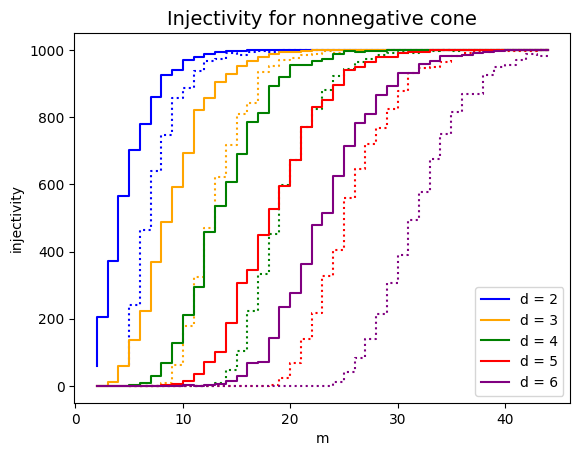

In [8]:
res_2345=[[61, 242, 464, 640, 746, 856, 888, 938, 968, 974, 991, 986, 994, 997, 995, 1000, 1000, 999, 1000, 1000, 999, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000], [0, 0, 0, 0, 10, 62, 178, 323, 469, 622, 716, 809, 841, 934, 953, 970, 976, 984, 989, 997, 992, 999, 999, 1000, 1000, 999, 1000, 1000, 1000, 1000,1000, 1000, 1000, 1000,1000,1000,1000,1000,1000, 1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 46, 105, 222, 332, 453, 598, 672, 771, 824, 880, 922, 942, 963, 973, 985, 991, 993, 991, 998, 997,1000, 998, 1000, 1000, 1000,1000,1000,1000,1000,1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 25, 69, 140, 216, 328, 405, 560, 647, 721, 767, 823, 878, 931, 945, 950, 964, 982, 991, 996, 993,999, 996, 997, 997, 1000]]
res6=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 1, 11, 40, 83, 141, 215,307,391,494,577,676,750,816,869,868,926,948,956,969,988,982]
plt.step(np.arange(5,45),res_2345[0],linestyle="dotted",color="blue")
plt.step(np.arange(5,45),res_2345[1],linestyle="dotted",color="orange")
plt.step(np.arange(5,45),res_2345[2],linestyle="dotted", color="green") 
plt.step(np.arange(5,45),res_2345[3],linestyle="dotted", color="red")
plt.step(np.arange(5,45),res6,linestyle="dotted", color="purple")
# Plot for constrained inejctivity
constr2=[58, 206, 372, 566, 701, 779, 860, 925, 941, 969, 978, 988, 993, 997, 998, 1000, 999,1000,1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,1000]+[1000]*10#2-34
constr3=[0, 0, 13, 60, 136, 224, 370, 488, 591, 694, 821, 856, 905, 927, 951, 966, 979,989, 995, 993, 998, 1000, 1000, 999, 1000, 999, 1000, 1000, 1000, 1000, 1000, 1000,1000]+[1000]*10
constr4=[0, 0, 0, 1, 4, 9, 31, 69, 128, 212, 295, 457, 534, 607, 691, 786, 811,892,919, 954, 954, 968, 973, 987, 997, 993, 997, 998, 999, 1000, 999, 999,1000]+[1000]*10
constr5=[0,0,0,0,0,0,0,3,6,15,34,72,101,186,305,346,449,528,596,671,770,830,852,895,941,948,965,979,978, 991, 994, 995, 999]+[1000]*10#2-29
constr6=[0,0,0,0,0,0,0,0,0,2,0,2,6,14,30,68,70,142,236,276,362,478,516,626,714,782,808,866,892,930,932,958,968,982, 982, 986, 990,995,998]+[1000]*4#11-34
plt.step(np.arange(2,45),constr2,label="d = 2",color="blue")
plt.step(np.arange(2,45),constr3,label="d = 3",color="orange")
plt.step(np.arange(2,45),constr4, label="d = 4",color="green")
plt.step(np.arange(2,45),constr5, label="d = 5",color="red")
plt.step(np.arange(2,45),constr6, label="d = 6",color="purple")
####
plt.xlabel("m")
plt.ylabel("injectivity")
plt.title("Injectivity for nonnegative cone", fontsize=14)
plt.legend()